In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_ct_signal(t, x_t, ylabel='x(t)'):
    plt.plot(t, x_t)
    plt.xlabel('t')
    plt.ylabel(ylabel)
    plt.show()

def plot_dt_signal(n, x_n, ylabel='x[n]'):
    plt.stem(n, x_n)
    plt.xlabel('n')
    plt.ylabel(ylabel)
    plt.show()

In [3]:
n = np.arange(-25, 26)
n_convolved = np.arange(-50, 51)
h = lambda n: -1 if -10 <= n < 10 else 0
x = lambda n: ((1/4) ** n) * (-1) if -5 <= n < 5 else 0 

h_n = np.array([h(i) for i in n])
x_n = np.array([x(i) for i in n])

t = np.linspace(-15, 15, 300)
t_convolved = np.linspace(-30, 30, 600-1)
h = lambda t: 1 if -3 <= t < 3 else 0
x = lambda t: 0.5 * np.exp(2 * t) if t <= 0 else 0

h_t = np.array([h(i) for i in t])
x_t = np.array([x(i) for i in t])

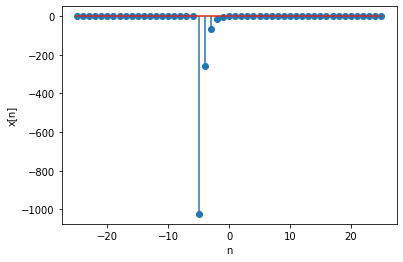

In [4]:
plot_dt_signal(n, x_n)

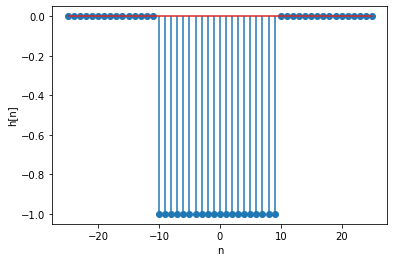

In [5]:
plot_dt_signal(n, h_n, ylabel='h[n]')

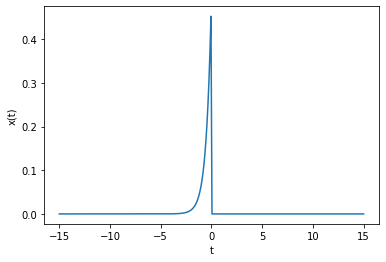

In [6]:
plot_ct_signal(t, x_t)

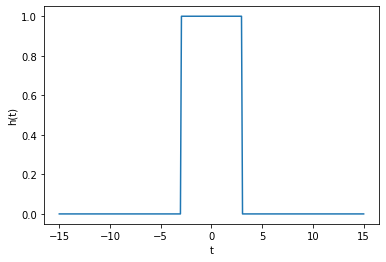

In [7]:
plot_ct_signal(t, h_t, ylabel='h(t)')

In [8]:
def convolution(x, h):
    if not all([len(x) > 0, len(h) > 0]):
        raise ValueError('INVALID INPUT')
    if len(h) > len(x):
        h, x = x, h    
 
    h = h[::-1]
    convolved = np.array([0.0 for _ in range(len(x) + len(h) - 1)])
    for n in range(len(convolved)):
        left = max(0, n-len(h)+1)
        right = min(len(x)-1, left+min(n, len(h)-1))
        m = 0
        if right - left != len(h) and left == 0:
            m = len(h) - 1 - right + left         
        for k in range(left, right+1):
            convolved[n] += x[k] * h[m+k-left] 

    return convolved 

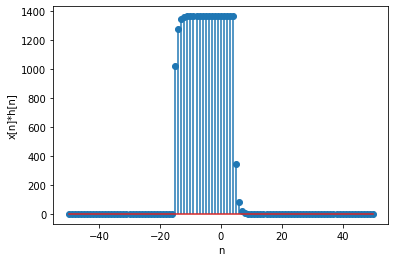

In [9]:
plot_dt_signal(n_convolved, convolution(x_n, h_n), ylabel='x[n]*h[n]')

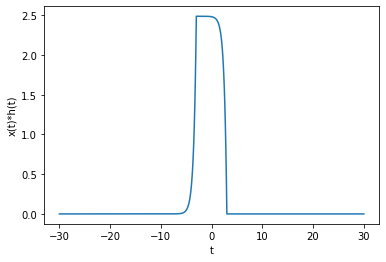

In [10]:
plot_ct_signal(t_convolved, convolution(x_t, h_t), ylabel='x(t)*h(t)')